### Tokenization

In [3]:
from nltk.tokenize import word_tokenize
my_text = "Hi Mr. Smith! I’m going to buy some vegetables (tomatoes and cucumbers)\
from the store. Should I pick up some black-eyed peas as well?"
print(word_tokenize(my_text)) # print function requires Python 3

['Hi', 'Mr.', 'Smith', '!', 'I', '’', 'm', 'going', 'to', 'buy', 'some', 'vegetables', '(', 'tomatoes', 'and', 'cucumbers', ')', 'from', 'the', 'store', '.', 'Should', 'I', 'pick', 'up', 'some', 'black-eyed', 'peas', 'as', 'well', '?']


In [4]:
from nltk.tokenize import sent_tokenize
my_text = "Hi Mr. Smith! I’m going to buy some vegetables (tomatoes and cucumbers)\
from the store. Should I pick up some black-eyed peas as well?"
print(sent_tokenize(my_text))

['Hi Mr. Smith!', 'I’m going to buy some vegetables (tomatoes and cucumbers)from the store.', 'Should I pick up some black-eyed peas as well?']


In [5]:
from nltk.util import ngrams
my_words = word_tokenize(my_text) # This is the list of all words
twograms = list(ngrams(my_words,2)) # This is for two-word combos, but can pick any n
print(twograms)

[('Hi', 'Mr.'), ('Mr.', 'Smith'), ('Smith', '!'), ('!', 'I'), ('I', '’'), ('’', 'm'), ('m', 'going'), ('going', 'to'), ('to', 'buy'), ('buy', 'some'), ('some', 'vegetables'), ('vegetables', '('), ('(', 'tomatoes'), ('tomatoes', 'and'), ('and', 'cucumbers'), ('cucumbers', ')'), (')', 'from'), ('from', 'the'), ('the', 'store'), ('store', '.'), ('.', 'Should'), ('Should', 'I'), ('I', 'pick'), ('pick', 'up'), ('up', 'some'), ('some', 'black-eyed'), ('black-eyed', 'peas'), ('peas', 'as'), ('as', 'well'), ('well', '?')]


In [6]:
from nltk.tokenize import RegexpTokenizer
# RegexpTokenizer to match only capitalized words
cap_tokenizer = RegexpTokenizer("[A-Z]['\w]+")
print(cap_tokenizer.tokenize(my_text))

['Hi', 'Mr', 'Smith', 'Should']


### Removing Characters

In [7]:
import re # Regular expression library
import string
# Replace punctuations with a white space
clean_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', my_text)
clean_text

'Hi Mr  Smith  I’m going to buy some vegetables  tomatoes and cucumbers from the store  Should I pick up some black eyed peas as well '

In [8]:
#lower case
clean_text = clean_text.lower()
clean_text

'hi mr  smith  i’m going to buy some vegetables  tomatoes and cucumbers from the store  should i pick up some black eyed peas as well '

In [9]:
#remove numbers
clean_text = re.sub('\w*\d\w*', ' ', clean_text)
clean_text

'hi mr  smith  i’m going to buy some vegetables  tomatoes and cucumbers from the store  should i pick up some black eyed peas as well '

### Stop Words

In [10]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
my_text = ["Hi Mr. Smith! I’m going to buy some vegetables (tomatoes and cucumbers)\
from the store. Should I pick up some black-eyed peas as well?"]
# Incorporate stop words when creating the count vectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(my_text)
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,black,buy,cucumbers,eyed,going,hi,mr,peas,pick,smith,store,tomatoes,vegetables
0,1,1,1,1,1,1,1,1,1,1,1,1,1


### Stemming and Lemmatizing

In [14]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
# Try some stems
print('drive: {}'.format(stemmer.stem('drive')))
print('drives: {}'.format(stemmer.stem('drives')))
print('driver: {}'.format(stemmer.stem('driver')))
print('drivers: {}'.format(stemmer.stem('drivers')))
print('driven: {}'.format(stemmer.stem('driven')))

drive: driv
drives: driv
driver: driv
drivers: driv
driven: driv


### POS

In [15]:
from nltk.tag import pos_tag
my_text = "James Smith lives in the United States."
tokens = pos_tag(word_tokenize(my_text))
print(tokens)

[('James', 'NNP'), ('Smith', 'NNP'), ('lives', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('.', '.')]


In [17]:
from nltk.help import upenn_tagset
upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

### Named Entity Recognition

In [20]:
%matplotlib inline
from nltk.chunk import ne_chunk
my_text = "James Smith lives in the United States."
tokens = pos_tag(word_tokenize(my_text)) # this labels each word as a part of speech
entities = ne_chunk(tokens) # this extracts entities from the list of words
entities.draw()

### Compound Term Extraction

In [19]:
from nltk.tokenize import MWETokenizer # multi-word expression
my_text = "You all are the greatest students of all time."
mwe_tokenizer = MWETokenizer([('You','all'), ('of', 'all', 'time')])
mwe_tokens = mwe_tokenizer.tokenize(word_tokenize(my_text))
mwe_tokens

['You_all', 'are', 'the', 'greatest', 'students', 'of_all_time', '.']

### Levenstein Distance

In [21]:
import nltk
# string decleration
source = 'Data Science Learner'
target = 'Data Science Learners'
#distance calculation
distance=nltk.edit_distance(source , target )
print(distance)

1


### TExt Format for Analysis: Count Vectorizer

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
'This is the second document.',
'And the third one. One is fun.']
cv = CountVectorizer()
X = cv.fit_transform(corpus)
pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,fun,is,one,second,the,third,this
0,0,1,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,1,0,1
2,1,0,0,1,1,2,0,1,1,0


### Cosine Similarity

In [24]:
from numpy import dot
from numpy.linalg import norm
cosine = lambda v1, v2: dot(v1, v2) / (norm(v1) * norm(v2))
cosine([1, 1, 1, 0], [1, 1, 0, 1])

0.6666666666666667

### Document Similarity

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The weather is hot under the sun',
'I make my hot chocolate with milk',
'One hot encoding',
'I will have a chai latte with milk',
'There is a hot sale today']
# create the document-term matrix with count vectorizer
cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(corpus).toarray()
dt = pd.DataFrame(X, columns=cv.get_feature_names())
dt

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,chai,chocolate,encoding,hot,latte,make,milk,sale,sun,today,weather
0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,0,1,0,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0


In [27]:
# calculate the cosine similarity between all combinations of documents
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
# list all of the combinations of 5 take 2 as well as the pairs of phrases
pairs = list(combinations(range(len(corpus)),2))
combos = [(corpus[a_index], corpus[b_index]) for (a_index, b_index) in pairs]
# calculate the cosine similarity for all pairs of phrases and sort by most similar
results = [cosine_similarity([X[a_index]], [X[b_index]]) for (a_index, b_index) in pairs]
sorted(zip(results, combos), reverse=True)

[(array([[0.40824829]]),
  ('The weather is hot under the sun', 'One hot encoding')),
 (array([[0.40824829]]), ('One hot encoding', 'There is a hot sale today')),
 (array([[0.35355339]]),
  ('I make my hot chocolate with milk', 'One hot encoding')),
 (array([[0.33333333]]),
  ('The weather is hot under the sun', 'There is a hot sale today')),
 (array([[0.28867513]]),
  ('The weather is hot under the sun', 'I make my hot chocolate with milk')),
 (array([[0.28867513]]),
  ('I make my hot chocolate with milk', 'There is a hot sale today')),
 (array([[0.28867513]]),
  ('I make my hot chocolate with milk', 'I will have a chai latte with milk')),
 (array([[0.]]),
  ('The weather is hot under the sun', 'I will have a chai latte with milk')),
 (array([[0.]]), ('One hot encoding', 'I will have a chai latte with milk')),
 (array([[0.]]),
  ('I will have a chai latte with milk', 'There is a hot sale today'))]

### TF-IDF Vectorizer

In [31]:
import pandas as pd
corpus = ['This is the first document.',
'This is the second document.',
'And the third one. One is fun.']
# original Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
pd.DataFrame(X, columns=cv.get_feature_names())



C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,fun,is,one,second,the,third,this
0,0,1,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,1,0,1
2,1,0,0,1,1,2,0,1,1,0


In [32]:
# new TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,fun,is,one,second,the,third,this
0,0.00000,0.450145,0.591887,0.00000,0.349578,0.00000,0.000000,0.349578,0.00000,0.450145
1,0.00000,0.450145,0.000000,0.00000,0.349578,0.00000,0.591887,0.349578,0.00000,0.450145
2,0.36043,0.000000,0.000000,0.36043,0.212876,0.72086,0.000000,0.212876,0.36043,0.000000


### From previous examples: checking similarity with TF - IDF

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The weather is hot under the sun',
'I make my hot chocolate with milk',
'One hot encoding',
'I will have a chai latte with milk',
'There is a hot sale today']
# create the document-term matrix with count vectorizer
cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(corpus).toarray()
dt = pd.DataFrame(X, columns=cv.get_feature_names())
dt

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,chai,chocolate,encoding,hot,latte,make,milk,sale,sun,today,weather
0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,0,1,0,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the document-term matrix with TF-IDF vectorizer
cv_tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf = pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,chai,chocolate,encoding,hot,latte,make,milk,sale,sun,today,weather
0,0.000000,0.000000,0.000000,0.370086,0.000000,0.000000,0.000000,0.0000,0.6569,0.0000,0.6569
1,0.000000,0.580423,0.000000,0.327000,0.000000,0.580423,0.468282,0.0000,0.0000,0.0000,0.0000
2,0.000000,0.000000,0.871247,0.490845,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000
3,0.614189,0.000000,0.000000,0.000000,0.614189,0.000000,0.495524,0.0000,0.0000,0.0000,0.0000
4,0.000000,0.000000,0.000000,0.370086,0.000000,0.000000,0.000000,0.6569,0.0000,0.6569,0.0000


In [39]:
# calculate the cosine similarity between all combinations of documents
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
# list all of the combinations of 5 take 2 as well as the pairs of phrases
pairs = list(combinations(range(len(corpus)),2))
combos = [(corpus[a_index], corpus[b_index]) for (a_index, b_index) in pairs]
# calculate the cosine similarity for all pairs of phrases and sort by most similar
results = [cosine_similarity([X_tfidf[a_index]], [X_tfidf[b_index]]) for (a_index, b_index) in pairs]
sorted(zip(results, combos), reverse=True)

[(array([[0.23204486]]),
  ('I make my hot chocolate with milk', 'I will have a chai latte with milk')),
 (array([[0.18165505]]),
  ('The weather is hot under the sun', 'One hot encoding')),
 (array([[0.18165505]]), ('One hot encoding', 'There is a hot sale today')),
 (array([[0.16050661]]),
  ('I make my hot chocolate with milk', 'One hot encoding')),
 (array([[0.1369638]]),
  ('The weather is hot under the sun', 'There is a hot sale today')),
 (array([[0.12101835]]),
  ('The weather is hot under the sun', 'I make my hot chocolate with milk')),
 (array([[0.12101835]]),
  ('I make my hot chocolate with milk', 'There is a hot sale today')),
 (array([[0.]]),
  ('The weather is hot under the sun', 'I will have a chai latte with milk')),
 (array([[0.]]), ('One hot encoding', 'I will have a chai latte with milk')),
 (array([[0.]]),
  ('I will have a chai latte with milk', 'There is a hot sale today'))]

### Machine Learning Model

In [41]:
# make sure the data is labeled
import pandas as pd
data = pd.read_table('SMSSpamCollection', header=None)
data.columns = ['label', 'text']
print(data.head()) # print function requires Python 3

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [42]:
# remove words with numbers, punctuation and capital letters
import re
import string
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
data['text'] = data.text.map(alphanumeric).map(punc_lower)
print(data.head())

  label                                               text
0   ham  go until jurong point  crazy   available only ...
1   ham                      ok lar    joking wif u oni   
2  spam  free entry in   a wkly comp to win fa cup fina...
3   ham  u dun say so early hor    u c already then say   
4   ham  nah i don t think he goes to usf  he lives aro...


In [43]:
# split the data into inputs and outputs
X = data.text # inputs into model
y = data.label # output of model

In [44]:
X.head()

0    go until jurong point  crazy   available only ...
1                        ok lar    joking wif u oni   
2    free entry in   a wkly comp to win fa cup fina...
3    u dun say so early hor    u c already then say   
4    nah i don t think he goes to usf  he lives aro...
Name: text, dtype: object

In [45]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [46]:
# split the data into a training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test size = 30% of observations, which means training size = 70% of observations
# random state = 42, so we all get the same random train / test split

In [49]:
# Numerically encode the input data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train) # fit_transform learns the vocab and one-hot encodes
X_test_cv = cv.transform(X_test) # transform uses the same vocab and one-hot encodes
# print the dimensions of the training set (text messages, terms)
print(X_train_cv.toarray().shape)

(3900, 6103)


In [50]:
# Fit the model
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Train the model
lr.fit(X_train_cv, y_train)
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
data
y_pred_cv = lr.predict(X_test_cv)
y_pred_cv # The output is all of the predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

Accuracy: 0.985
Precision: 1.0
Recall: 0.888
F1 Score: 0.941


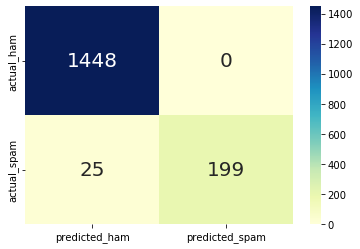

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))